In [2]:
import tensorflow as tf

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f62844eae10>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f628451b048>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f628451b470>)

In [7]:
mnist.train.images.shape , mnist.train.labels.shape

((55000, 784), (55000, 10))

In [8]:
#55000,28,28
mnist.train.labels

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [9]:
mnist.test.images.shape,mnist.train.labels.shape

((10000, 784), (55000, 10))

In [10]:
mnist.validation.images.shape

(5000, 784)

In [11]:
import numpy as np
from matplotlib import pyplot as plt

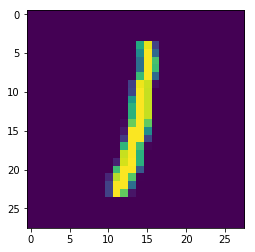

In [12]:
first_image = mnist.train.images[4]
first_image = np.array(first_image,dtype = 'float')
first_image= first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [13]:
with tf.Session() as sess:
    print(tf.random_normal([784,256]).eval())

[[-1.43803287 -0.86380208  0.61443847 ..., -0.29574132 -0.54988152
   0.35988697]
 [ 0.13577756 -0.97482926  0.05409298 ..., -0.33873123  1.83391523
  -1.94931972]
 [-0.03737509 -2.01623058  1.42164636 ...,  0.24831508 -1.62578142
   0.28381473]
 ..., 
 [-1.47261691  0.18091197  0.63437968 ...,  0.27454686  0.31316605
  -0.67216522]
 [-0.08301774  0.56795239  1.17747235 ...,  1.65719879  1.79352331
  -0.35808086]
 [-2.08431602 -1.25850213 -1.0386225  ..., -0.91516751 -0.31432757
   0.71798444]]


In [14]:
n_input = 784
n_hidden1 = 256
n_hidden2 = 256
n_classes = 10

weights = {
    
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden1])),
    'h2':tf.Variable(tf.random_normal([n_hidden1,n_hidden2])),
    'out':tf.Variable(tf.random_normal([n_hidden2,n_classes]))
}

biases = {
    
    'h1':tf.Variable(tf.random_normal([n_hidden1])),
    'h2':tf.Variable(tf.random_normal([n_hidden2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [15]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>]

In [16]:
def forward_propagation(x,weights,biases):
    in_layer1 = tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    output =tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])
    return output

In [17]:
#finding accuracy and predictions

In [18]:
# creating x
x = tf.placeholder('float',[None,n_input])
y = tf.placeholder(tf.int32,[None,n_classes])
pred = forward_propagation(x,weights,biases)

In [19]:
#cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred,labels=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [20]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01)
optimize = optimizer.minimize(cost)

In [28]:
sess= tf.Session()
sess.run(tf.global_variables_initializer())

In [29]:
for i in range(25) :
    c,_ = sess.run([cost,optimize],feed_dict = {x:mnist.train.images,y:mnist.train.labels})
    
c

72.437874

In [30]:
pred  =forward_propagation(x,weights,biases)
predictions = tf.arg_max(pred,1)
true_labels = tf.argmax(y,1)
correct_predictions = tf.equal(predictions,true_labels)
predictions_evaluated,labels,correct_pred = sess.run([predictions,true_labels,correct_predictions],feed_dict = {x:mnist.train.images,y:mnist.train.labels})

In [31]:
correct_pred.sum()/55000

0.8582727272727273

In [33]:
#batch_GD
batch_size = 100
for i in range(25) :
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        c,_ = sess.run([cost,optimize],feed_dict = {x:batch_x,y:batch_y})
        total_cost += c
    print(total_cost)

123.185174667
117.815607429
96.8574461769
81.3201774705
92.0407781351
100.81095534
70.4485078608
75.8816798237
67.1731219776
67.715153961
67.6751514451
55.192735947
65.4035108162
68.4716933204
58.5891964989
59.7025358438
49.8685008789
54.4113004863
78.080696224
49.539976611
46.6222547389
46.0106918474
43.7237764979
48.115802722
41.5863736618


In [34]:
pred  =forward_propagation(x,weights,biases)
predictions = tf.arg_max(pred,1)
true_labels = tf.argmax(y,1)
correct_predictions = tf.equal(predictions,true_labels)
predictions_evaluated,labels,correct_pred = sess.run([predictions,true_labels,correct_predictions],feed_dict = {x:mnist.train.images,y:mnist.train.labels})
correct_pred.sum()/55000

0.98383636363636362